In [28]:
%load_ext autoreload
%autoreload 2

import numpy as np
import tensorflow as tf
import tensorflow_probability as tfp
import matplotlib.pyplot as plt
from src.ksd.ksd import KSD
from src.ksd.kernel import RBF

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
tf.random.set_seed(0)

In [177]:
xx = tf.constant([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
yy = tf.constant([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
tf.linalg.matmul(xx, yy, transpose_b=True)

<tf.Tensor: shape=(2, 2, 2), dtype=int32, numpy=
array([[[ 14,  32],
        [ 32,  77]],

       [[194, 266],
        [266, 365]]], dtype=int32)>

In [185]:
xx = tf.constant([[[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[7, 8, 9], [10, 11, 12], [13, 14, 15]]], [[[1, 2, 3], [4, 5, 6], [7, 8, 9]], [[7, 8, 9], [10, 11, 12], [13, 14, 15]]]])
tf.linalg.diag_part(xx)

<tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
array([[[ 1,  5,  9],
        [ 7, 11, 15]],

       [[ 1,  5,  9],
        [ 7, 11, 15]]], dtype=int32)>

In [160]:
target = tfp.distributions.Normal(0., 1.)
proposal = tfp.distributions.Normal(0., 1.)

kernel = RBF()

In [161]:
proposal_sample = proposal.sample((1000, 1))

(array([  3.,   2.,  46., 134., 218., 280., 202.,  82.,  25.,   8.]),
 array([-3.8501272 , -3.1273663 , -2.4046054 , -1.6818446 , -0.9590837 ,
        -0.23632276,  0.48643813,  1.2091991 ,  1.9319599 ,  2.6547208 ,
         3.3774817 ], dtype=float32),
 <BarContainer object of 10 artists>)

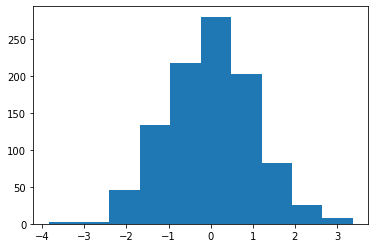

In [162]:
plt.hist(proposal_sample.numpy())

In [163]:
ksd = KSD(target=target, kernel=kernel)

In [188]:
a = ksd(proposal_sample, tf.identity(proposal_sample))

terms: tf.Tensor(92264.01, shape=(), dtype=float32) tf.Tensor(-86366.65, shape=(), dtype=float32) tf.Tensor(-86366.65, shape=(), dtype=float32) tf.Tensor(90861.36, shape=(), dtype=float32)


In [189]:
a

<tf.Tensor: shape=(), dtype=float32, numpy=0.010392071>

In [166]:
a

<tf.Tensor: shape=(), dtype=float32, numpy=0.010392071>